In [1]:
import pandas as pd
import os
from itables import show

# Meteostat

In [2]:
pip install meteostat

In [10]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

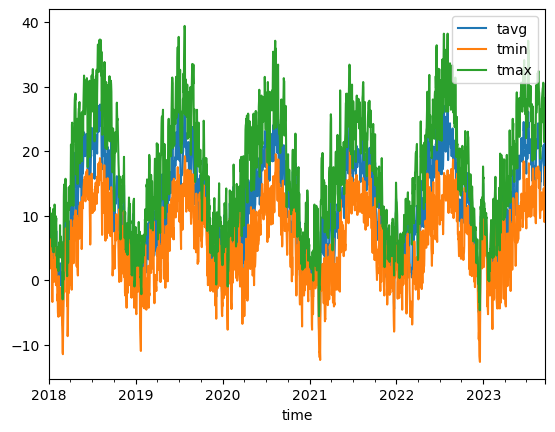

In [44]:
# Set time period
start = datetime(2018, 1, 1)
end = datetime(2023, 9, 18)

# Create Point for Darmstadt (elevation Luisenplatz = 147m)
darmstadt = Point(49.8728, 8.6512, 147)

#get daily data
data = Daily(darmstadt, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

### Verify that there is a weather station in Darmstadt

In [14]:
from meteostat import Stations

# Get nearby weather stations
stations = Stations()
stations = stations.nearby(49.8728, 8.6512)
station = stations.fetch(1)

# Print DataFrame
station

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
D0917,Darmstadt,DE,HE,<NA>,<NA>,49.8809,8.6779,162.0,Europe/Berlin,1981-01-01,2023-09-13,1995-08-01,2023-09-13,1995-01-01,2022-01-01,2114.658927


## Get hourly weather data for Darmstadt

In [17]:

from datetime import datetime
from meteostat import Hourly

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2022, 12, 31, 23, 59)

# Get hourly data
data = Hourly('D0917', start, end)
data = data.fetch()

data


,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2018-01-01 00:00:00,11.0,5.7,70.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,10.4,5.6,72.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,10.0,4.8,70.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 03:00:00,9.5,3.7,67.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2018-01-01 04:00:00,9.3,3.5,67.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,14.4,7.9,65.0,0.0,NaN,213.0,21.2,NaN,1016.2,NaN,3.0
2022-12-31 20:00:00,14.7,8.0,64.0,0.0,NaN,212.0,20.9,NaN,1016.3,NaN,3.0
2022-12-31 21:00:00,14.9,7.9,63.0,0.0,NaN,211.0,21.2,NaN,1016.8,NaN,3.0


# Weather data City Darmstadt

In [43]:
weather_data = pd.read_csv('D:\\Data Science\\VS Code\\final_project\\Luftmessung_Darmstadt\\Darmstadt_Wetter.txt', sep = ';')
weather_data['date'] = pd.to_datetime(weather_data['Datum'], format='%d.%m.%Y')
weather_data['Zeit'] = weather_data['Zeit'].replace('24:00', '00:00')
weather_data['Zeit'] = pd.to_datetime(weather_data['Zeit'], format='%H:%M')
weather_data['time'] = weather_data['Zeit'].dt.time

weather_data.drop(columns = ['Datum', 'Zeit', 'Unnamed: 7'], inplace=True)
#convert columns to numeric values
for column in columns_to_convert:
    weather_data[column] = weather_data[column].str.replace(',', '.')
columns_to_convert = ['Luftdruck[hPa]', 'Relative Luftfeuchtigkeit[%]', 'Temperatur[°C]', 'Windgeschwindigkeit[m/s]', 'Windrichtung[Grad]']

weather_data[columns_to_convert] = weather_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

weather_data

,Luftdruck[hPa],Relative Luftfeuchtigkeit[%],Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad],date,time
0,1004.0,61.0,11.5,2.6,235.0,2018-01-01,00:30:00
1,1004.0,62.7,11.0,2.7,244.0,2018-01-01,01:00:00
2,1004.0,64.0,10.7,2.0,229.0,2018-01-01,01:30:00
3,1004.0,65.5,10.4,2.1,235.0,2018-01-01,02:00:00
4,1005.0,65.0,10.2,2.6,243.0,2018-01-01,02:30:00
...,...,...,...,...,...,...,...
100143,1007.0,85.2,18.9,0.8,166.0,2023-09-18,08:00:00
100144,1007.0,81.6,19.4,0.9,157.0,2023-09-18,08:30:00
100145,1007.0,79.8,19.8,1.2,173.0,2023-09-18,09:00:00
100146,1007.0,76.4,20.4,1.2,176.0,2023-09-18,09:30:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100148 entries, 0 to 100147
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Luftdruck[hPa]                100130 non-null  float64       
 1   Relative Luftfeuchtigkeit[%]  100128 non-null  float64       
 2   Temperatur[°C]                100128 non-null  float64       
 3   Windgeschwindigkeit[m/s]      93623 non-null   float64       
 4   Windrichtung[Grad]            93594 non-null   float64       
 5   date                          100148 non-null  datetime64[ns]
 6   time                          100148 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 5.3+ MB
